In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('words')
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def mostrar_frecuencias(datos):
    tokens_concatenate=np.concatenate(datos['tokens'])
    fdist = nltk.FreqDist(tokens_concatenate)
    topwords = fdist.most_common(20)
    x,y = zip(*topwords)
    print('Numero de tokens:',len(fdist))
    for i,token in enumerate(topwords[0:20]):
        print(i+1,token)
    plt.figure(figsize=(8,6))
    plt.bar(x,y)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
%time datos = pd.read_csv('data_clean.csv').rename(columns={'ticket':'tokens'})

Wall time: 305 ms


In [ ]:
datos

,categorias,tokens,etiquetas
0,Mylife,arval death notifitication of death ssn spouse...,2
1,Mylife,cd d jr retiree death notification no benefits...,2
2,Admin,corporate efax message from s have received a ...,1
3,Admin,corporate efax message from spandsp fax ident ...,1
4,Admin,corporate efax message from spandsp fax ident ...,1
...,...,...,...
19334,OM (organizationa mgmt),is currently listed under project manager he n...,0
19335,OM (organizationa mgmt),please change position name of position to ele...,0
19336,OM (organizationa mgmt),update position to reflect floating manager po...,0
19337,OM (organizationa mgmt),update subgroup to,0


In [ ]:
# tokenizacion
%time datos['tokens']=datos['tokens'].apply(nltk.word_tokenize)

Wall time: 19.1 s


Numero de tokens: 857967
1 ('a', 153060)
2 ('d', 140788)
3 ('f', 138925)
4 ('b', 134693)
5 ('c', 133155)
6 ('e', 131107)
7 ('s', 130699)
8 ('t', 128776)
9 ('x', 126011)
10 ('v', 125562)
11 ('i', 125052)
12 ('k', 124352)
13 ('z', 123320)
14 ('y', 122826)
15 ('u', 121553)
16 ('n', 120609)
17 ('h', 120337)
18 ('m', 120336)
19 ('j', 119230)
20 ('r', 118723)


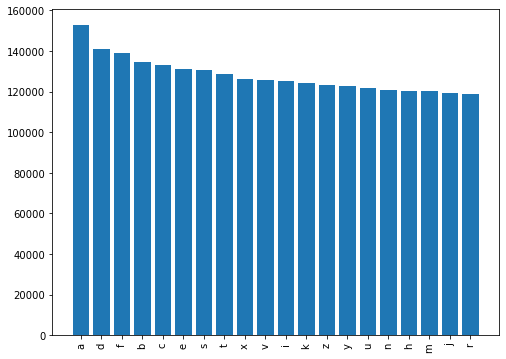

Wall time: 9.85 s


In [ ]:
%time mostrar_frecuencias(datos)

In [ ]:
# limpieza de tokens
def limpiar_tokens(tokens):
    tokens=[re.sub(r'[^A-Za-z0-9]+',' ',token) for token in tokens]
    tokens=[token.lower() for token in tokens if len(token)>2]
    tokens=[token for token in tokens if token not in stopwords_nltk]
    return tokens

%time datos['tokens']=datos['tokens'].apply(limpiar_tokens)

Wall time: 8.1 s


Numero de tokens: 857163
1 ('email', 39370)
2 ('com', 28772)
3 ('please', 23995)
4 ('send', 20571)
5 ('message', 19998)
6 ('https', 17850)
7 ('order', 16505)
8 ('unsubscribe', 15905)
9 ('group', 15402)
10 ('information', 15370)
11 ('emails', 14743)
12 ('receiving', 14467)
13 ('stop', 14452)
14 ('lafargeholcim', 12707)
15 ('virtru', 12278)
16 ('www', 11937)
17 ('nbsp', 11136)
18 ('hire', 10974)
19 ('shipping', 10693)
20 ('brochure', 10550)


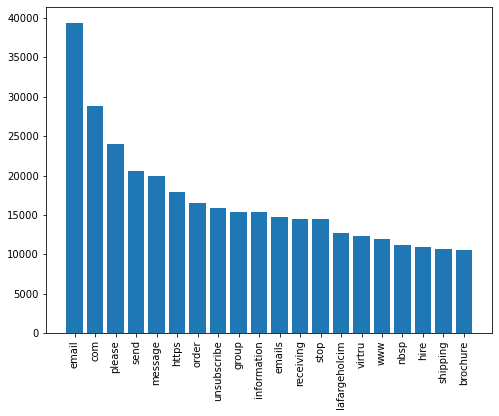

Wall time: 4.4 s


In [ ]:
%time mostrar_frecuencias(datos)

In [ ]:
tag_dict = {
    "J": nltk.corpus.wordnet.ADJ,
    "N": nltk.corpus.wordnet.NOUN,
    "V": nltk.corpus.wordnet.VERB,
    "R": nltk.corpus.wordnet.ADV
}

lemmatizer = nltk.stem.WordNetLemmatizer()
noun=nltk.corpus.wordnet.NOUN
%time datos['tokens']=datos['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, tag_dict.get(nltk.pos_tag([token])[0][1][0].upper(), noun)) for token in tokens])

Wall time: 28min 44s


Numero de tokens: 853756
1 ('email', 54224)
2 ('com', 28772)
3 ('http', 26670)
4 ('please', 23996)
5 ('receive', 23296)
6 ('send', 20721)
7 ('order', 20703)
8 ('message', 20116)
9 ('unsubscribe', 15905)
10 ('group', 15424)
11 ('information', 15377)
12 ('stop', 14536)
13 ('lafargeholcim', 12707)
14 ('virtru', 12278)
15 ('www', 11937)
16 ('hire', 11348)
17 ('nbsp', 11136)
18 ('shipping', 10693)
19 ('brochure', 10554)
20 ('thank', 10319)


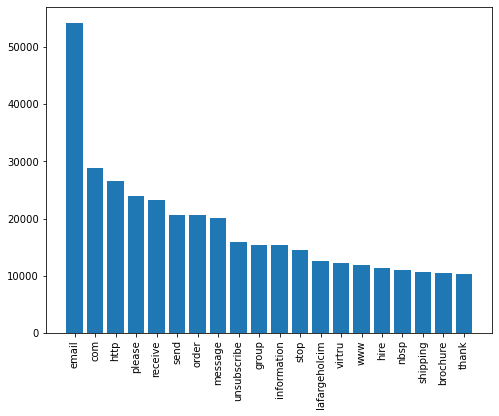

Wall time: 4.48 s


In [ ]:
%time mostrar_frecuencias(datos)

In [ ]:
stemmer=nltk.stem.SnowballStemmer("english")

In [ ]:
%time datos['tokens']=datos['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

Wall time: 40 s


Numero de tokens: 846461
1 ('email', 54225)
2 ('com', 28772)
3 ('http', 26670)
4 ('pleas', 24015)
5 ('receiv', 23362)
6 ('send', 20759)
7 ('order', 20703)
8 ('messag', 20116)
9 ('ship', 16008)
10 ('unsubscrib', 15905)
11 ('inform', 15678)
12 ('group', 15424)
13 ('stop', 14536)
14 ('lafargeholcim', 12707)
15 ('manag', 12533)
16 ('thank', 12338)
17 ('virtru', 12278)
18 ('www', 11937)
19 ('hire', 11348)
20 ('secur', 11141)


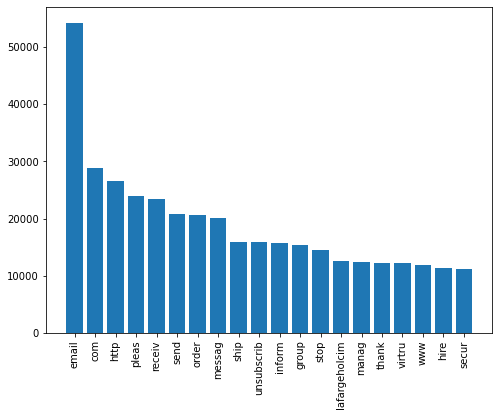

Wall time: 4.38 s


In [ ]:
%time mostrar_frecuencias(datos)

In [ ]:
datos.to_csv('data_tokens.csv',index=False)